The mean acceptance is  0.353474873753


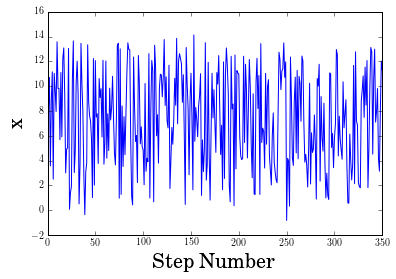

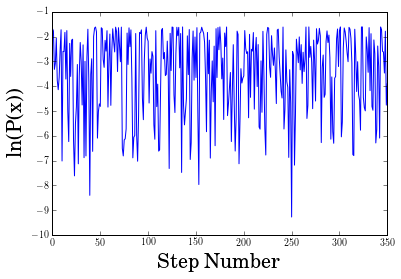

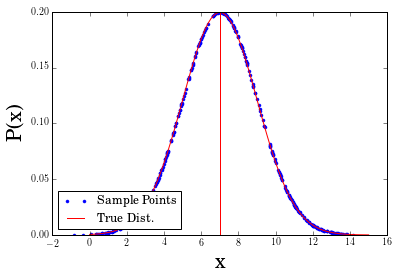

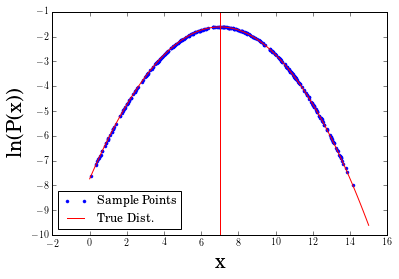

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
text_size = 20

sigma = 2
mu = 7
steps = 1000

def one_d_gaus(x, mu, sigma):
    "Returns P(x) value of 1-Dimensional Gaussian with mean mu and standard deviation sigma"
    p = (1/math.sqrt(2*np.pi*sigma**2)*np.exp(-(mu-x)**2/(2*sigma**2)))
    return p

def mc_chain():
    p_list = []
    acceptance_list = []
    x_list =[]
    x_1 = np.random.rand(1)
    p_1 = one_d_gaus(x_1, mu, sigma)
    for i in range(steps):
        #pick random x(i+1) value from gaussian centered at previous value
        x_2 = np.random.normal(loc = x_1, scale = 15)
        #find P(x) for the new x value
        p_2 = one_d_gaus(x_2, mu, sigma)
        r = np.random.rand(1)
        #calculate the acceptance value of the two probabilities
        acceptance = p_2/p_1
        #if acceptance is greater than 1, update x_1 to x_2 and append the x_list and p_list
        if acceptance > 1.:
            acceptance_list.append(1)
            p_list.append(p_2)
            x_list.append(x_2)
            x_1 = x_2
        #if acceptance is less than 1, check it against a random float between 0 and 1
        elif acceptance >= r:
            acceptance_list.append(acceptance)
            p_list.append(p_2)
            x_list.append(x_2)
        else:
            acceptance_list.append(acceptance)
    return [x_list, p_list, acceptance_list]

#run the MCMC chain
[x_list, p_list, acceptance_list] = mc_chain()       

print 'The mean acceptance is ',np.mean(acceptance_list)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#x vs. Step Number
plt.figure(1)
plt.plot(x_list)
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'x', fontsize = text_size)
plt.savefig('step_vs_x_mcmc.png', dpi=300)

#calculate ln(P)
p_log = []
for n,i in enumerate(p_list): 
    p_log.append(np.log(i))

#ln(P(x)) vs. Step Number
plt.figure(2)
plt.plot(p_log)
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'ln(P(x))', fontsize = text_size)
plt.savefig('lnp_step_number_mcmc.png', dpi=300)

#create array of real distribution for both P(x) and ln(P(x))
p_gaus = []
p_log_real = []
for i in np.linspace(0,15, num=100):
    p_gaus_item = one_d_gaus(i, mu, sigma)
    p_gaus.append(one_d_gaus(i, mu, sigma))
    p_log_real.append(np.log(p_gaus_item))

#plot P(x) vs. x of samples and real dist
plt.figure(3)
plt.plot(x_list, p_list, '.', label = 'Sample Points')
plt.plot(np.linspace(0,15, num=100), p_gaus,alpha = 1, color = 'red', label = 'True Dist.')
plt.xlabel(r'x', fontsize = text_size)
plt.ylabel(r'P(x)', fontsize = text_size)
plt.axvline(7., color = 'red')
plt.legend(loc = 3)
plt.savefig('p_x_mcmc_true.png', dpi=300)

#plot ln(P(x)) vs. x of samples and real dist
plt.figure(4)
plt.plot(x_list, p_log, '.', label = 'Sample Points')
plt.plot(np.linspace(0,15, num=100), p_log_real,alpha = 1, color = 'red', label = 'True Dist.')
plt.xlabel(r'x', fontsize = text_size)
plt.ylabel(r'ln(P(x))', fontsize = text_size)
plt.axvline(7., color = 'red')
plt.legend(loc = 3)
plt.savefig('lnp_x_true_mcmc.png', dpi=300)


plt.show()
